In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow ## only for colab
import os
os.environ["QT_QPA_PLATFORM"] = "xcb" # to prevent qt errors on some arch linux systems

# Question 1

In [32]:
cat_img = "cat.jpg"

In [33]:
def imp_gray(img_loc):
  image = cv2.imread(img_loc)
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  return gray_image

In [34]:
cat_image = cv2.imread(cat_img)
cat_gray_image = cv2.cvtColor(cat_image, cv2.COLOR_BGR2GRAY)
print(cat_gray_image)


[[199 202 205 ... 194 195 199]
 [199 202 205 ... 195 196 200]
 [198 201 204 ... 195 197 202]
 ...
 [136 135 135 ...  59  56  51]
 [135 134 133 ...  57  56  49]
 [134 133 132 ...  54  55  46]]


In [35]:
flatten_gimg = cat_gray_image.flatten()
print(flatten_gimg)

[199 202 205 ...  54  55  46]


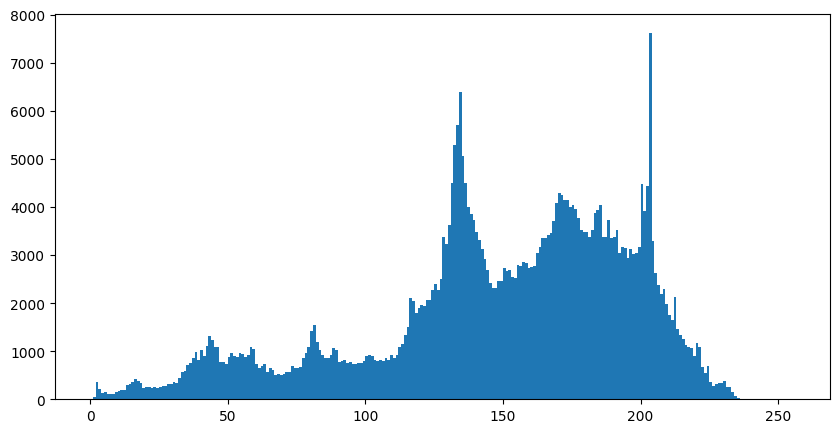

In [36]:
plt.figure(figsize=(10, 5))
hists = plt.hist(flatten_gimg, bins=256, range=(0, 256))
plt.show()

# Question 2

### Verifying sum of freq = total no. of pixels

In [37]:
print(np.sum(hists[0]))
print(cat_image.shape)
print(220*220)

409600.0
(640, 640, 3)
48400


# Question 3

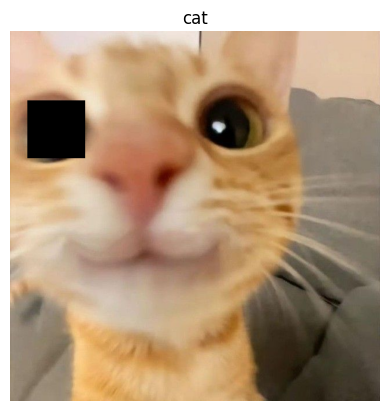

In [53]:
# This changes overall intensity of the image
# image_int = image * 5
# cv2_imshow(image_int)

start_row = 120
start_colm = 30
width = 100

masked_image = cat_image.copy()
for i in range(start_row, start_row + width):
  for j in range(start_colm, start_colm + width):
    masked_image[i][j] = 0

# Display inline using matplotlib instead of cv2.imshow
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.title("cat")
plt.axis('off')
plt.show()

In [39]:
people_img = "people.png"

people_gray = imp_gray(people_img)
print(people_gray)

[[  0   0   0 ...   0   0   0]
 [  0 209 212 ... 244 244   0]
 [  0 211 213 ... 244 245   0]
 ...
 [  0 130 129 ...  56  56   0]
 [  0 130 129 ...  59  58   0]
 [  0   0   0 ...   0   0   0]]


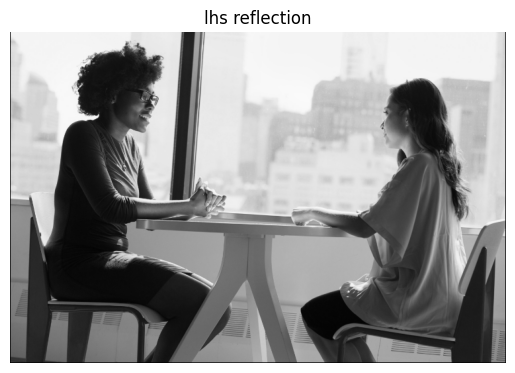

In [66]:
height, width = people_gray.shape

img_LHS_reflection = people_gray.copy()
img_RHS_reflection = people_gray.copy()
img_center_reflection = people_gray.copy()

for y in range(height):
    for x in range(width):
        img_LHS_reflection[y][x] = people_gray[y][width - 1 - x]

# both will look the same logic wise
for y in range(height):
    for x in range(width):
        img_RHS_reflection[y][x] = people_gray[y][width - 1 - x]


for y in range(height):
    for x in range(width // 2):
        img_center_reflection[y, x] = people_gray[y, width - 1 - x]
        img_center_reflection[y, width - 1 - x] = people_gray[y, x]

plt.imshow(cv2.cvtColor(img_LHS_reflection, cv2.COLOR_BGR2RGB))
plt.title("lhs reflection")
plt.axis('off')
plt.show()


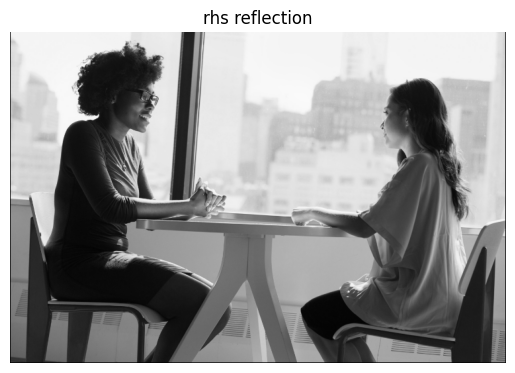

In [65]:
plt.imshow(cv2.cvtColor(img_RHS_reflection, cv2.COLOR_BGR2RGB))
plt.title("rhs reflection")
plt.axis('off')
plt.show()


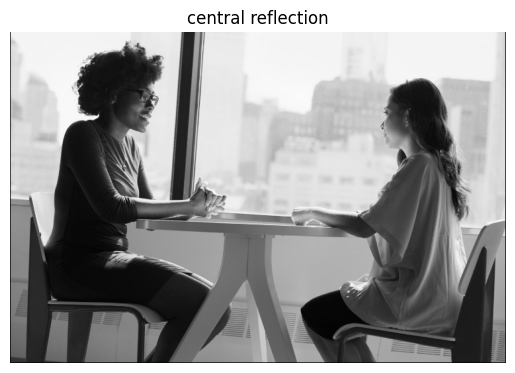

In [62]:
plt.imshow(cv2.cvtColor(img_center_reflection, cv2.COLOR_BGR2RGB))
plt.title("central reflection")
plt.axis('off')
plt.show()



# Question 4

Theres 3 images of circle used here 8cm, 15cm, 30cm height. all the analysis is done on the 8cm one.

In [41]:
circle_15cm_filled = "15cm_circle_filled.jpg"
circle_30cm_filled = "30cm_circle_filled.jpg"

circle_8cm_filled = "8cm_circle_filled.jpg"

In [42]:
circle_15cm_filled_matrix = cv2.imread(circle_15cm_filled)
circle_30cm_filled_matrix = cv2.imread(circle_30cm_filled)
circle_8cm_filled_matrix = cv2.imread(circle_8cm_filled)

circle_15cm_filled_gray = cv2.cvtColor(circle_15cm_filled_matrix, cv2.COLOR_BGR2GRAY)
circle_30cm_filled_gray = cv2.cvtColor(circle_30cm_filled_matrix, cv2.COLOR_BGR2GRAY)
circle_8cm_filled_gray = cv2.cvtColor(circle_8cm_filled_matrix, cv2.COLOR_BGR2GRAY)

print(circle_15cm_filled_gray.shape)
print(circle_30cm_filled_gray.shape)

print(circle_8cm_filled_gray.shape)

(1496, 1496)
(1496, 1496)
(2992, 2992)


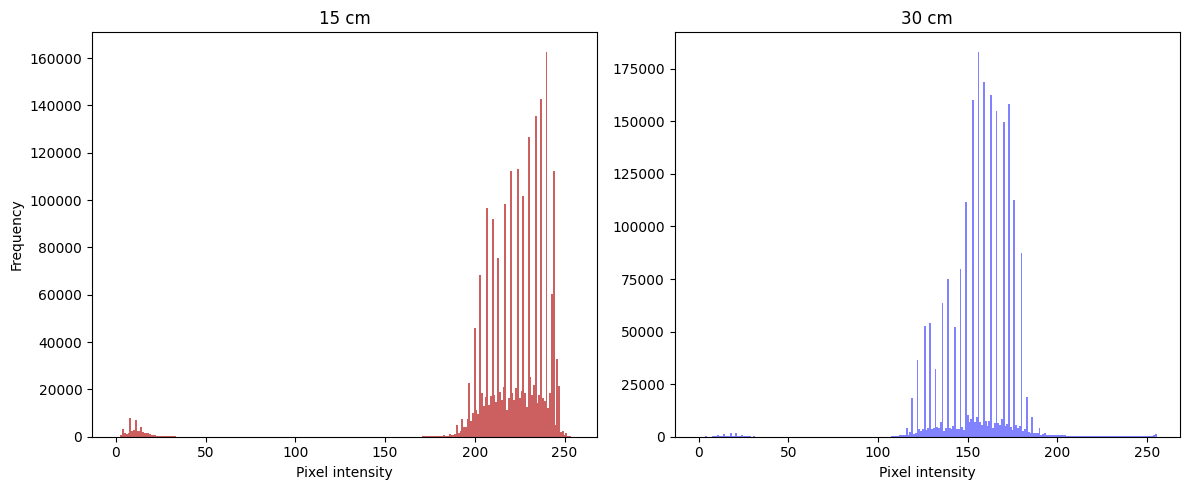

In [43]:
hist_gray_15cm,_ = np.histogram(circle_15cm_filled_gray, bins=256, range=(0, 256))
hist_gray_30cm,_ = np.histogram(circle_30cm_filled_gray, bins=256, range=(0, 256))

bins = np.arange(256)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(bins, hist_gray_15cm, width=1.0, color="#CC6060")
axes[0].set_title("15 cm")
axes[0].set_xlabel("Pixel intensity")
axes[0].set_ylabel("Frequency")

axes[1].bar(bins, hist_gray_30cm, width=1.0, color="#8082FF")
axes[1].set_title("30 cm")
axes[1].set_xlabel("Pixel intensity")

plt.tight_layout()
plt.show()



In [44]:
print("Std dev of 15cm", np.std(hist_gray_15cm))
print("Std dev of 30cm", np.std(hist_gray_30cm))

Std dev of 15cm 25376.487037862677
Std dev of 30cm 29817.14953326462


- 15cm is narrow while 30cm is wide. 30cm has more background with variation than 15cm. Thus 30cm having more constrast as it contains more background and vingetting. it will have more standard dev as well

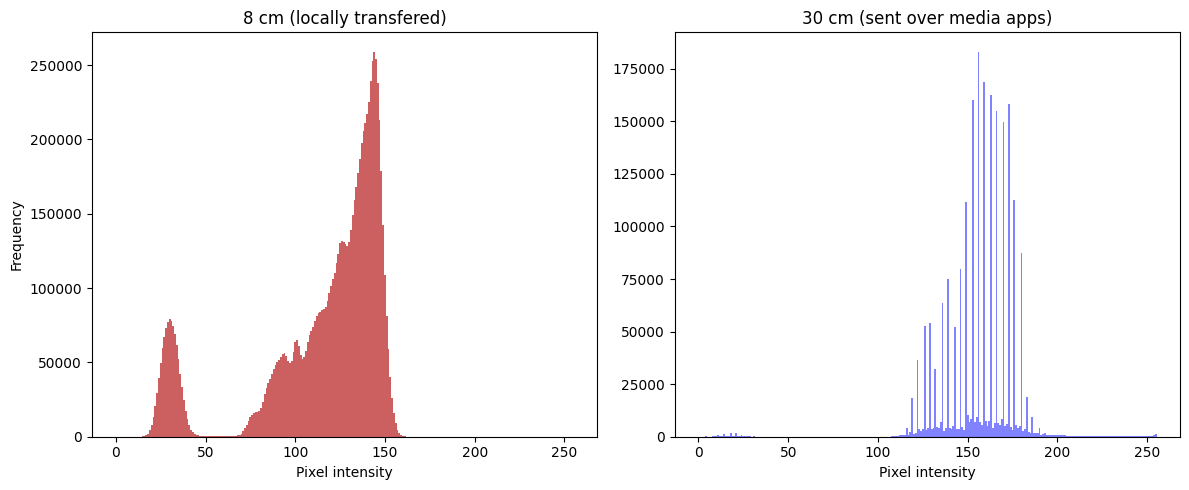

In [45]:
hist_gray_8cm,_ = np.histogram(circle_8cm_filled_gray, bins=256, range=(0, 256))
hist_gray_30cm,_ = np.histogram(circle_30cm_filled_gray, bins=256, range=(0, 256))

bins = np.arange(256)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(bins, hist_gray_8cm, width=1.0, color="#CC6060")
axes[0].set_title("8 cm (locally transfered)")
axes[0].set_xlabel("Pixel intensity")
axes[0].set_ylabel("Frequency")

axes[1].bar(bins, hist_gray_30cm, width=1.0, color="#8082FF")
axes[1].set_title("30 cm (sent over media apps)")
axes[1].set_xlabel("Pixel intensity")

plt.tight_layout()
plt.show()



the left image is transfered using data cable directly from phone to pc
while the right image is sent using a social media app (discord), we can see that media apps compress the image decreasing the resolution and creating these gaps in the data (removing some colors as a step of compression)

# Question 5

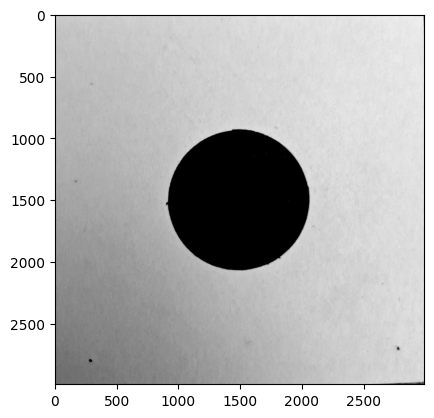

In [46]:
# Isolating the circle

manual_threshold = 50

thresholed_8cm = []

for i in circle_8cm_filled_gray:
    row = []
    for j in i:
        if j > manual_threshold:
            row.append(j)
        else:
            row.append(0)
    thresholed_8cm.append(row)

plt.imshow(thresholed_8cm,cmap="gray")

In [47]:
thresholed_8cm = np.array(thresholed_8cm)
np.shape(thresholed_8cm)

(2992, 2992)

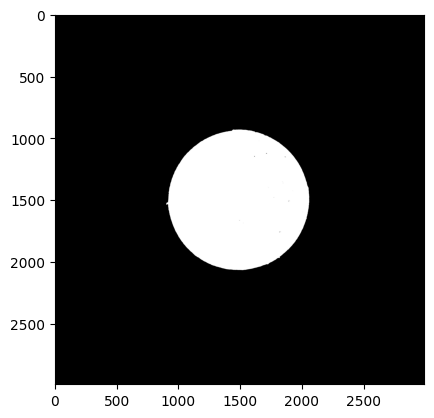

In [48]:
start_pixel = 700
end_pixel = 700
width = 1500

isolated_circle_8cm = np.zeros(np.shape(thresholed_8cm), dtype=thresholed_8cm.dtype)

for i in range(start_pixel, start_pixel + width):
    for j in range(end_pixel, end_pixel + width):
        if thresholed_8cm[i, j] < 50:
            isolated_circle_8cm[i, j] = 255

plt.imshow(isolated_circle_8cm, cmap="gray")
plt.show()

### get area of the circle

In [49]:
circle_pixels = 0

for i in isolated_circle_8cm:
    for j in i:
        if j != 0:
            circle_pixels += 1

r = np.sqrt(circle_pixels/np.pi) # pixels
"""
Actual Radius = 1.35cm
2992pixel = 7.5cm
"""
print("pixel radius =",r)

multiplier = 7.5/2992 # cm/pixels
radius = multiplier * r # cm

print("Image Radius in cm =",radius)

pixel radius = 567.069754244368
Image Radius in cm = 1.4214649588344788


### calculating focal length

In [50]:
actual_radius = 1.35
image_radius = radius
distance = 8/2


f = (actual_radius*distance)/image_radius
print("Focal Length in mm =",f*10)

Focal Length in mm = 37.98897726207543
